In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [40]:
no_reg = pd.read_csv('no_reg.csv',delimiter=',')

In [44]:
reg = pd.read_csv('reg.csv',delimiter=',')

In [42]:
list(reg)

['theta1',
 'theta2',
 'theta3',
 'theta4',
 'accuracy',
 'labeled_loss',
 'unlabeled_loss',
 'sol_accuracy',
 'sol_unlabeled_loss']

In [43]:
bins = [0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84]
reg['sol_accuracy_bins'] = pd.cut(reg['sol_accuracy_bins'],bins)

In [58]:
bins = np.arange(0.200,0.220,0.001)
reg['sol_unlabeled_loss_bins'] = pd.cut(reg['sol_unlabeled_loss'],bins)

In [62]:
bins = np.arange(0.200,0.220,0.001)
no_reg['sol_unlabeled_loss_bins'] = pd.cut(no_reg['sol_unlabeled_loss'],bins)

In [67]:
bins = np.arange(0.200,0.220,0.001)
no_reg['sol_accuracy_bins'] = pd.cut(no_reg['sol_accuracy'],bins)

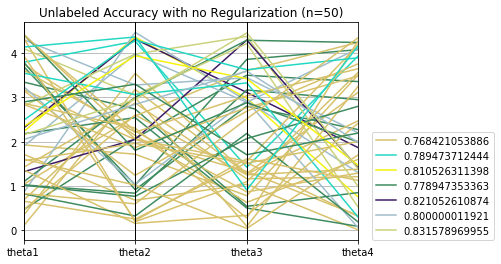

In [70]:
plt.figure()
plt.title("Unlabeled Accuracy with no Regularization (n=50)")
parallel_coordinates(no_reg[['theta1','theta2','theta3','theta4','sol_accuracy']][:50], 'sol_accuracy')
plt.legend(loc=(1.04,0))
plt.show()

In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from LP import LP
from DeepLP import DeepLP
from DeepLP_RBF import DeepLP_RBF
from DeepLP_WeightedRBF import DeepLP_WeightedRBF
from DeepLP_WeightedRBF_t import DeepLP_WeightedRBF_t

from utils import *

# get labels, features and weights
LX, Ly, UX, Uy, Uy_sol = get_iris_data()
features = np.vstack((LX,UX))
true_labels = np.hstack((Ly,Uy_sol))
weights = rbf_kernel(features)
num_features = features.shape[1]
num_labeled = len(Ly)
num_unlabeled = len(Uy)
num_nodes = num_labeled+num_unlabeled
graph = (weights > 0).astype(int)

# prepare features for NN
LY = np.tile(Ly,(Ly.shape[0],1))
np.fill_diagonal(LY, 0.5)
UY = np.tile(Uy,(Ly.shape[0],1))

masked_ = np.hstack((np.identity(LY.shape[0]),np.zeros((Ly.shape[0],Uy.shape[0]))))
true_labeled = np.array([1] * LY.shape[0] + [0] * Uy.shape[0]).reshape(1,100)

unlabeled_test = np.hstack((np.zeros(LY.shape[0]),np.ones((Uy.shape[0])))).reshape(1,100)
test_data = {
    'X': np.hstack((Ly,Uy)).reshape(1,100),
    'y': np.tile(true_labels,(Ly.shape[0],1))[1:2],
    'unlabeled': unlabeled_test,
    'labeled': (1 - unlabeled_test).reshape(1,100),
    'true_labeled': true_labeled,
    'masked':masked_[0:1]
}

unlabeled_ = np.hstack((np.identity(LY.shape[0]),np.ones((Ly.shape[0],Uy.shape[0]))))
data = {
    'X':np.hstack((LY, UY)),
    'y':np.reshape(true_labels,(1,len(true_labels))),
    'unlabeled':unlabeled_,
    'labeled':1-unlabeled_,
    'true_labeled': true_labeled,
    'masked':masked_
}

import time
start = time.time()
import csv
import sys



In [7]:

theta = np.random.uniform(0,4.5,4)
print("----------------------------------")
print("theta:",theta)
print("----------------------------------")
sess = tf.Session()

dlp_wrbf = DeepLP_WeightedRBF(10, num_nodes, features, graph, np.var(features), theta, 0.01, sess, 0)
dlp_wrbf.train(data,test_data,100)

----------------------------------
theta: [ 3.88036264  2.88680129  2.70705528  4.28040676]
----------------------------------
epoch: -1 labeled loss: 0.549027 unlabeled loss: 0.369236 accuracy: 0.276 sol unlabeled loss: 0.284335 sol accuracy: 0.368421
epoch: 0 labeled loss: 0.540916 unlabeled loss: 0.364161 accuracy: 0.284 sol unlabeled loss: 0.280735 sol accuracy: 0.389474
theta: [ 3.83038378  2.83680081  2.65702248  4.23038244]
epoch: 10 labeled loss: 0.446189 unlabeled loss: 0.302648 accuracy: 0.428 sol unlabeled loss: 0.239064 sol accuracy: 0.589474
theta: [ 3.3384459   2.34098077  2.12938952  3.70910597]
epoch: 20 labeled loss: 0.341951 unlabeled loss: 0.235561 accuracy: 0.598 sol unlabeled loss: 0.198625 sol accuracy: 0.894737
theta: [ 2.80453396  1.90663111  1.57905459  3.17021632]
epoch: 30 labeled loss: 0.298008 unlabeled loss: 0.216435 accuracy: 0.706 sol unlabeled loss: 0.194235 sol accuracy: 0.905263
theta: [ 2.25724506  1.62023008  1.24175882  2.8528502 ]
epoch: 40 labele

In [6]:
dlp_wrbf.regularize

0.1

In [ ]:
dlp_wrbf.train(data,test_data,100)

In [ ]:
sess = tf.Session()
dlp_wrbf = DeepLP_WeightedRBF(10, num_nodes, features, graph, np.var(features), theta, 0.01, sess, 0.1)
dlp_wrbf.train(data,test_data,100)

writer1.writerow(np.concatenate((theta,[dlp_wrbf.accuracies[-1],dlp_wrbf.labeled_losses[-1],dlp_wrbf.unlabeled_losses[-1],dlp_wrbf.sol_accuracies[-1],dlp_wrbf.sol_unlabeled_losses[-1]])))
outfile1.close()

end = time.time()
print(end - start)

dlp_wrbf.sess.close()
sess.close()
